In [1]:
import pandas as pd

monsters = pd.read_csv("monsters.csv", index_col="sifra")
spells_and_traps = pd.read_csv("spell_trap.csv", index_col="sifra")

In [33]:
napadalni = monsters[["ime", "ATK", "DEF", "level", "summon condition", "tipi"]].sort_values("ATK", ascending=False)
napadalni.head(10)

,ime,ATK,DEF,level,summon condition,tipi
sifra,,,,,,
12381100,Dragon Master Magia,5000,4000.0,12.0,"""Blue-Eyes Ultimate Dragon"" or 3 ""Blue-Eyes"" m...","Effect Monster,Dragon"
56863746,Drytron Meteonis DA Draconids,5000,5000.0,12.0,NaN,"Effect Monster,Machine"
23288411,Mementoal Tecuhtlica - Combined Creation,5000,5000.0,11.0,NaN,"Effect Monster,Wyrm"
58931850,Dragon Master Lords,5000,5000.0,12.0,2 Level 12 monsters,"Effect Monster,Dragon"
37542782,Cyberdark End Dragon,5000,3800.0,12.0,"""Cyberdark Dragon"" + ""Cyber End Dragon""","Effect Monster,Machine"
66523544,Superdimensional Robot Galaxy Destroyer,5000,2000.0,10.0,3 Level 10 monsters,"Effect Monster,Machine"
87460579,Flower Cardian Lightflare,5000,0.0,10.0,1 Tuner + 4 non-Tuner monsters,"Effect Monster,Warrior"
99267150,Five-Headed Dragon,5000,5000.0,12.0,NaN,"Effect Monster,Dragon"
10669138,Five-Headed Link Dragon,5000,800.0,NaN,NaN,"Effect Monster,Dragon"


In [34]:
defenzivni = monsters[["ime", "ATK", "DEF", "level", "summon condition", "tipi"]].sort_values("DEF", ascending=False)
defenzivni.head(10)

,ime,ATK,DEF,level,summon condition,tipi
sifra,,,,,,
81677154,Mementotlan Tatsunootoshigo,1350,16000.0,5.0,NaN,"Effect Monster,Beast"
58931850,Dragon Master Lords,5000,5000.0,12.0,2 Level 12 monsters,"Effect Monster,Dragon"
37115575,Malefic Truth Dragon,5000,5000.0,12.0,NaN,"Effect Monster,Dragon"
76821171,"Duralume, Vaalmonican Heathen Hallow",2500,5000.0,NaN,NaN,"Effect Monster,Fairy"
23288411,Mementoal Tecuhtlica - Combined Creation,5000,5000.0,11.0,NaN,"Effect Monster,Wyrm"
17745969,Super Vehicroid - Mobile Base,0,5000.0,10.0,"1 ""roid"" Fusion Monster + 1 ""roid"" monster","Effect Monster,Machine"
99267150,Five-Headed Dragon,5000,5000.0,12.0,NaN,"Effect Monster,Dragon"
56863746,Drytron Meteonis DA Draconids,5000,5000.0,12.0,NaN,"Effect Monster,Machine"
17775525,Superheavy Samurai Steam Train King,2000,4800.0,12.0,"1 ""Superheavy Samurai"" Tuner + 2+ non-Tuner ""S...","Effect Monster,Machine"


<Axes: xlabel='level'>

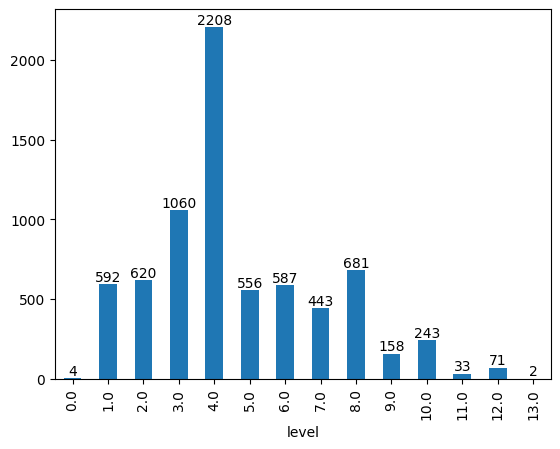

In [ ]:
graf = monsters.groupby("level")["ime"].count().plot.bar()
labels = graf.bar_label(graf.containers[0])
graf

<Axes: title={'center': 'Razmerje moči'}, xlabel='ATK', ylabel='DEF'>

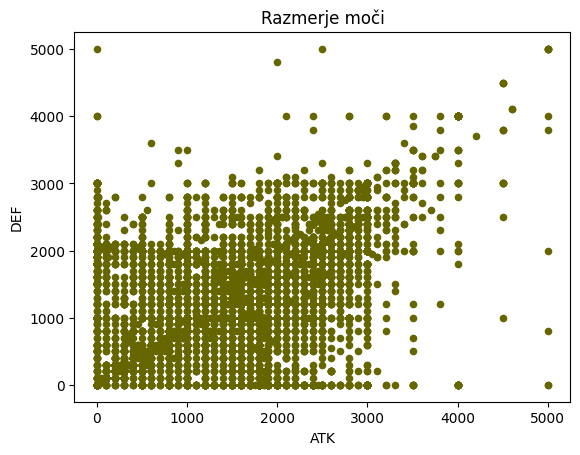

In [67]:
pošasti = monsters[monsters["DEF"] < 10000]
#se veliko bolje vidi ker ima le 1 monster "DEF" 16 000
pošasti.plot.scatter(x="ATK", y="DEF", title="Razmerje moči", color="#666600")

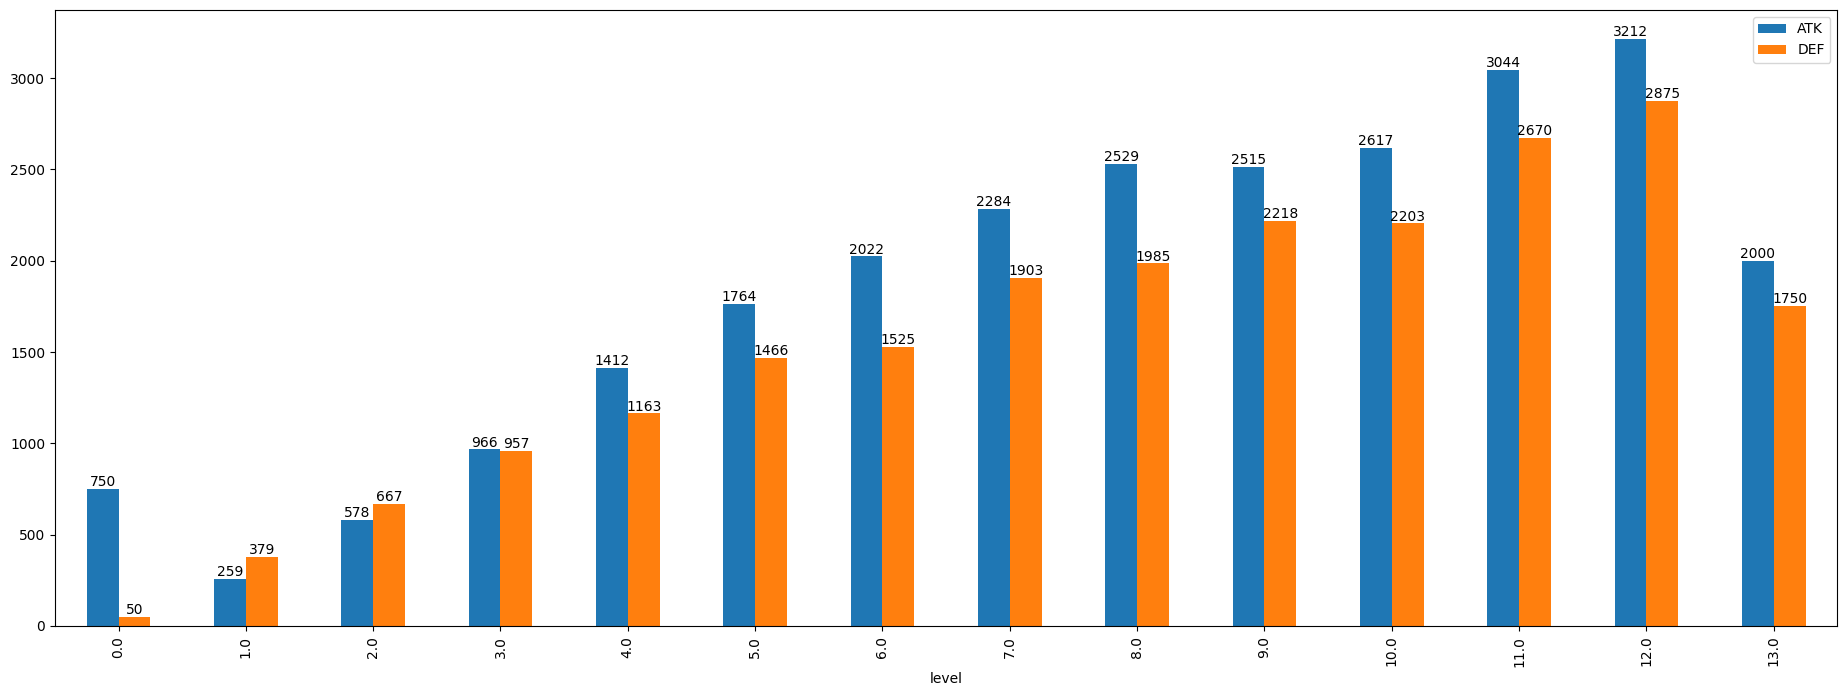

In [85]:
graf = monsters.groupby("level")[["ATK", "DEF"]].mean().plot.bar(figsize=(23, 8) )
for container in graf.containers:
    graf.bar_label(container, fmt="%.0f")